In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import scipy.stats as stats

In [71]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import distance_modules as d
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)
importlib.reload(d)

<module 'distance_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\distance_modules.py'>

In [7]:
sample_size, nr_sample_sets = 100, 20

bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample_sets, sample_size)
bounded_samples_st = dm.get_st_samples(bounded_dists, nr_sample_sets, sample_size)

heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample_sets, sample_size, transform=True)

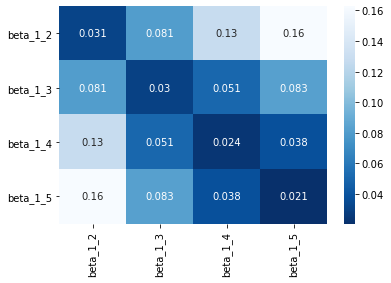

In [51]:
# original distance for bounded samples
original_d, original_std = d.w_distance(bounded_samples)
d.plot_matrix(original_d, bounded_samples.iloc[:,-1].unique())

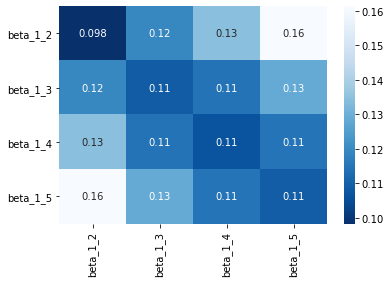

In [52]:
# original distance for standardized bounded samples
original_d, original_std = d.w_distance(bounded_samples_st)
d.plot_matrix(original_d, bounded_samples_st.iloc[:,-1].unique())

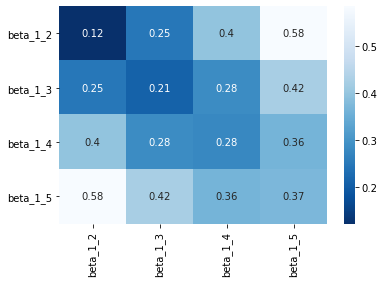

(0.8958383870479303, 2.697689928262603e-06)

In [64]:
nr_moments = 4
moments_df = dem.get_moments(bounded_samples_st, nr_moments)
moments_d, moments_std = d.w_distance(moments_df)
d.plot_matrix(moments_d, moments_df.iloc[:,-1].unique())
d.corr_coef(original_d,moments_d)

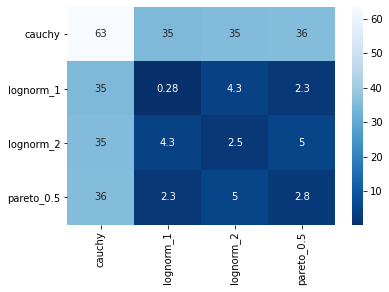

In [65]:
# original distance for heavytail samples
original_d, original_std = d.w_distance(heavytail_samples)
d.plot_matrix(original_d, heavytail_samples.iloc[:,-1].unique())

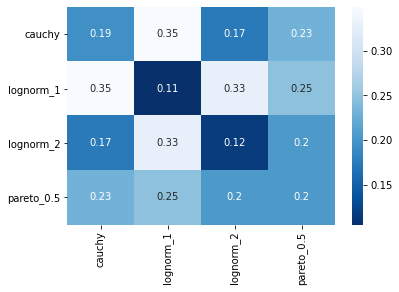

In [66]:
# original distance for standardized heavytail samples
original_d, original_std = d.w_distance(heavytail_samples_st)
d.plot_matrix(original_d, heavytail_samples_st.iloc[:,-1].unique())

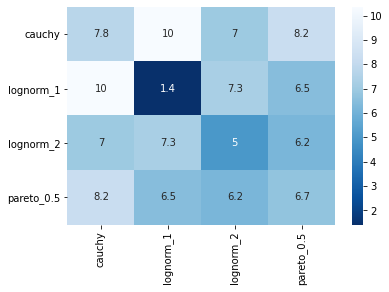

(0.7653437017756641, 0.0005501572571576228)

In [67]:
nr_moments = 4
moments_df = dem.get_moments(heavytail_samples_st, nr_moments)
moments_d, moments_std = d.w_distance(moments_df)
d.plot_matrix(moments_d, moments_df.iloc[:,-1].unique())
d.corr_coef(original_d,moments_d)

### Moments approach

In [13]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
nr_moments_list = list(range(1,21))

#### 1- Bounded

In [16]:
moments_res = d.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

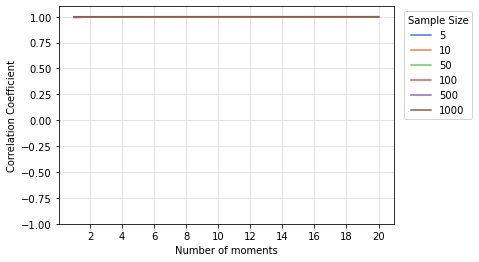

In [17]:
d.plot_cv_moments(moments_res)

#### 2 - standardized

In [18]:
moments_st_res = d.cv_samplesize_moments(sample_size_list, nr_moments_list, bounded_dists, nr_sample_sets, standardize = True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

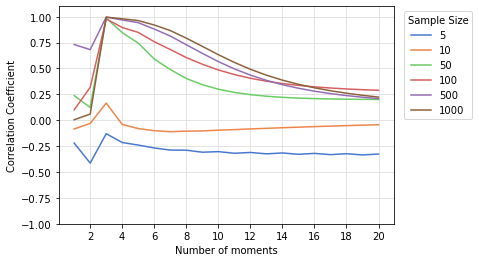

In [19]:
d.plot_cv_moments(moments_st_res)

#### 3 - Varying number of elements

wasserstein_distance doesnt work if two inputs vary in length

#### 4 - Multi-modal Gaussian

In [20]:
nr_mm_dist = 10
nr_modes = 5

In [21]:
moments_mm_res = d.cv_samplesize_moments_mm(sample_size_list, nr_moments_list, nr_sample_sets, nr_mm_dist, nr_modes)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

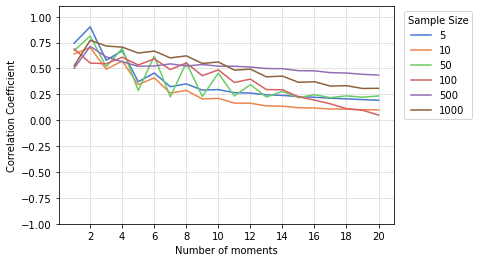

In [22]:
d.plot_cv_moments(moments_mm_res)

#### 5 - Heavytail

In [23]:
moments_ht_res = d.cv_samplesize_moments(sample_size_list, nr_moments_list, heavytail_dists, nr_sample_sets, transform = True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

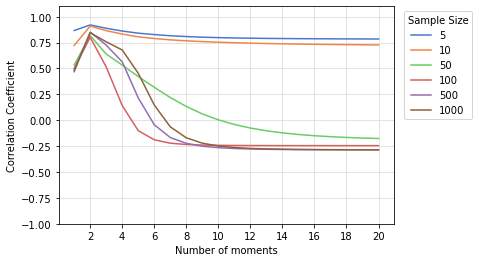

In [24]:
d.plot_cv_moments(moments_ht_res)

In [25]:
moments_res.to_csv('results/moments/corr_distance_bounded.csv')
moments_st_res.to_csv('results/moments/corr_distance_bounded_st.csv')
moments_mm_res.to_csv('results/moments/corr_distance_multimodal.csv')
moments_ht_res.to_csv('results/moments/corr_distance_heavytail.csv')

### KDE

In [26]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
num_steps_list = list(np.arange(2,21))

#### Bounded

In [27]:
kde_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample_sets, 'kde')

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

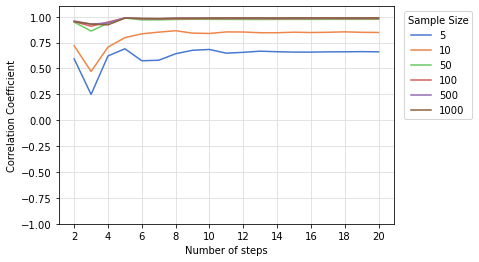

In [28]:
d.plot_cv_numsteps_samplesize(kde_res)

#### Standardized

In [29]:
kde_st_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample_sets, 'kde', standardize=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

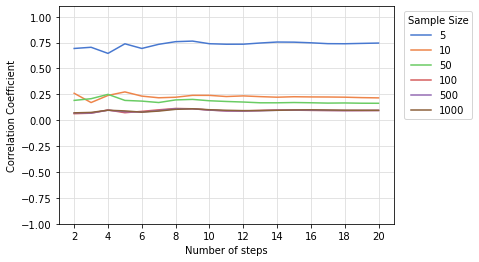

In [48]:
d.plot_cv_numsteps_samplesize(kde_st_res)

#### Heavytail

In [35]:
kde_ht_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, heavytail_dists, nr_sample_sets, 'kde', transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

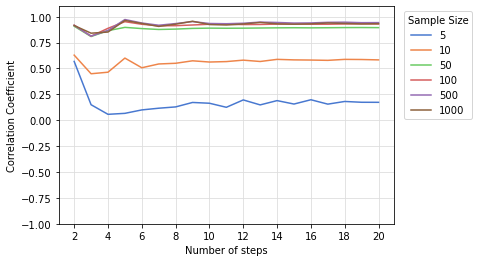

In [36]:
d.plot_cv_numsteps_samplesize(kde_ht_res)

#### multimodal Gaussian

In [32]:
nr_mm_dist = 10
nr_modes = 5
kde_mm_res = d.cv_numsteps_samplesize_mm(sample_size_list, num_steps_list, nr_sample_sets, nr_mm_dist, nr_modes, 'kde')

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

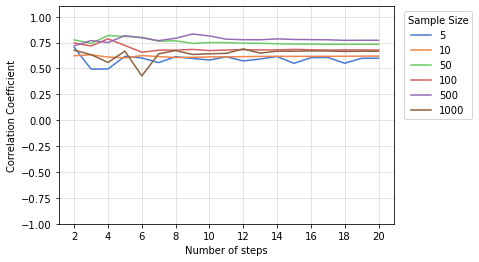

In [34]:
d.plot_cv_numsteps_samplesize(kde_mm_res)

In [39]:
kde_res.to_csv('results/kde/corr_distance_bounded.csv')
kde_st_res.to_csv('results/kde/corr_distance_bounded_st.csv')
kde_ht_res.to_csv('results/kde/corr_distance_heavytail.csv')
kde_mm_res.to_csv('results/kde/corr_distance_multimodal.csv')

### EDF

#### Bounded

In [40]:
edf_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample_sets, 'edf')

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

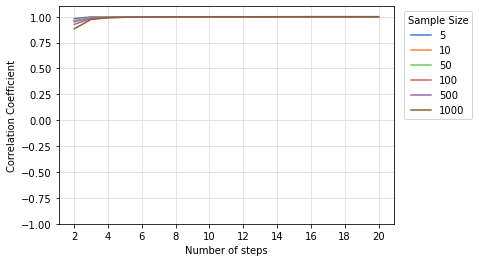

In [41]:
d.plot_cv_numsteps_samplesize(edf_res)

#### Standardized

In [42]:
edf_st_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, nr_sample_sets, 'edf', standardize=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

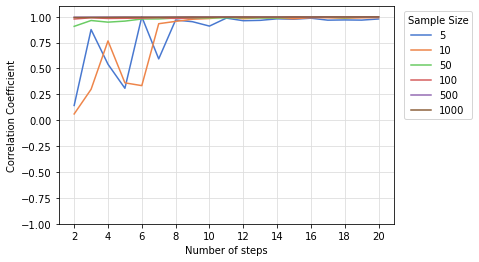

In [43]:
d.plot_cv_numsteps_samplesize(edf_st_res)

#### multimodal Gaussian

In [44]:
nr_mm_dist = 10
nr_modes = 5
edf_mm_res = d.cv_numsteps_samplesize_mm(sample_size_list, num_steps_list, nr_sample_sets, nr_mm_dist, nr_modes, 'edf')

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

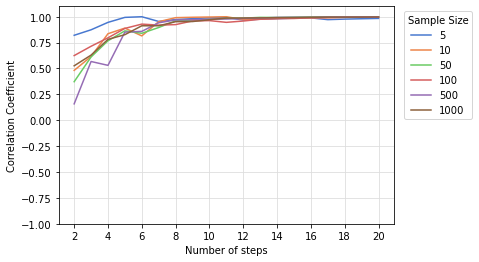

In [46]:
d.plot_cv_numsteps_samplesize(edf_mm_res)

#### Heavy tail

In [45]:
edf_ht_res = d.cv_numsteps_samplesize(sample_size_list, num_steps_list, heavytail_dists, nr_sample_sets, 'edf', transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

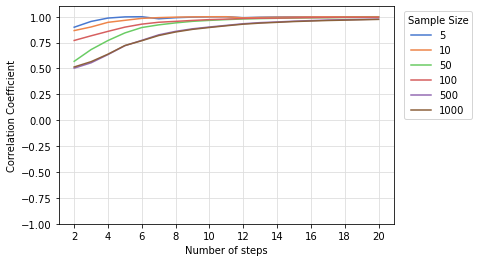

In [47]:
d.plot_cv_numsteps_samplesize(edf_ht_res)

### ECF

In [62]:
sample_size_list = [5, 10, 50, 100, 500, 1000]
num_steps_list = np.arange(2,21)
max_t_list = [1, np.pi, 5, 3*np.pi, 50]

In [63]:
ecf_res = d.cv_ecf(sample_size_list, max_t_list, num_steps_list, bounded_dists, nr_sample_sets)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

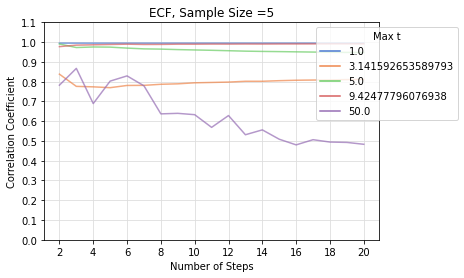

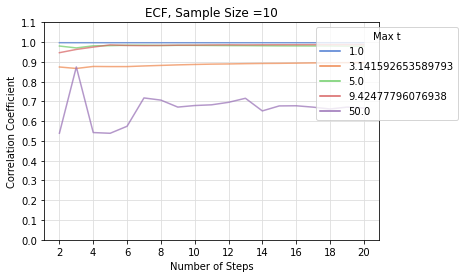

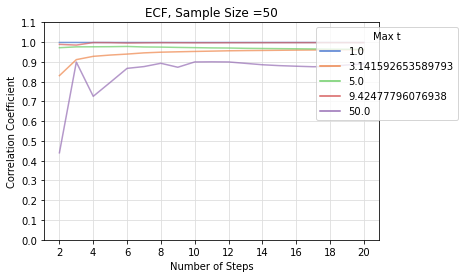

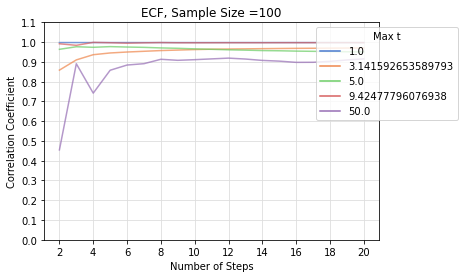

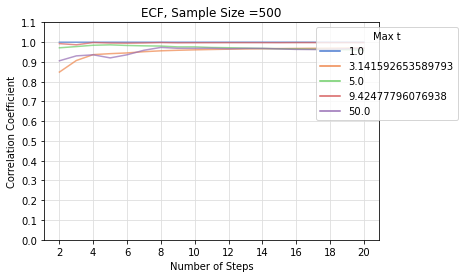

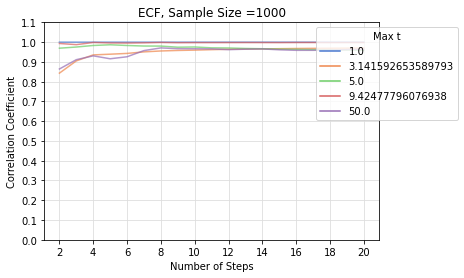

In [72]:
d.plot_cv_ecf(ecf_res)

#### standardized

In [65]:
ecf_st_res = d.cv_ecf(sample_size_list, max_t_list, num_steps_list, bounded_dists, nr_sample_sets, standardize=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

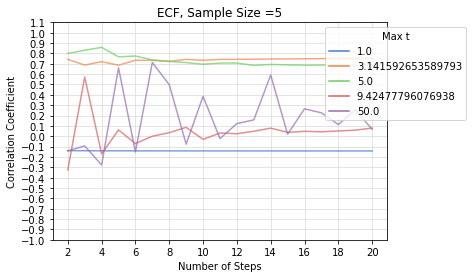

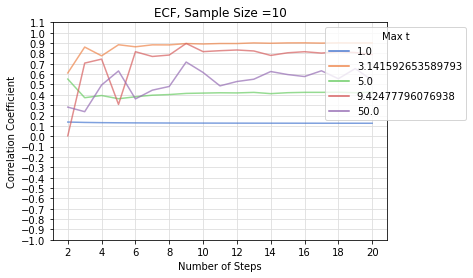

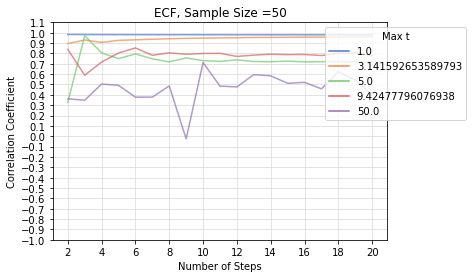

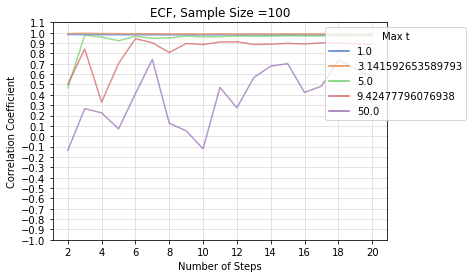

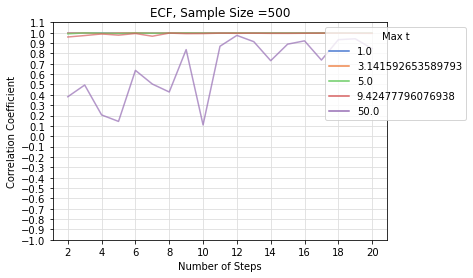

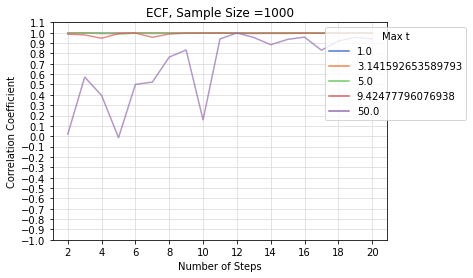

In [66]:
d.plot_cv_ecf(ecf_st_res)

#### heavy tail

In [67]:
ecf_ht_res = d.cv_ecf(sample_size_list, max_t_list, num_steps_list, heavytail_dists, nr_sample_sets, transform=True)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

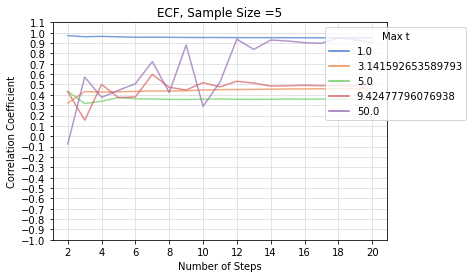

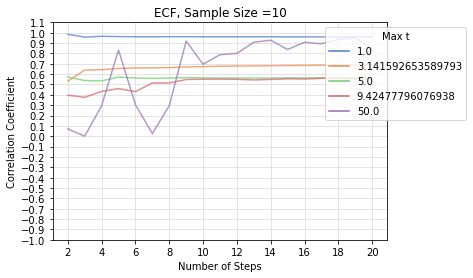

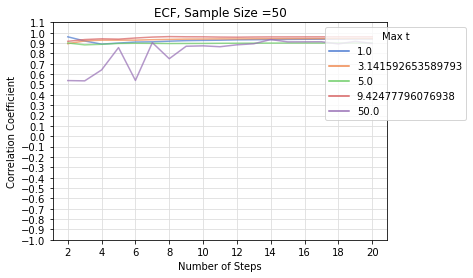

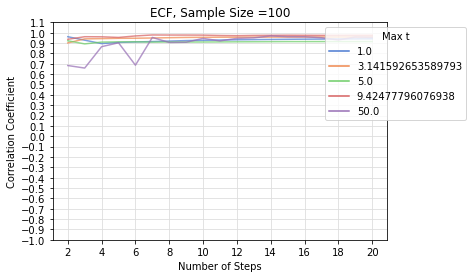

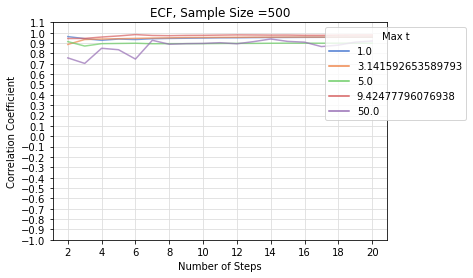

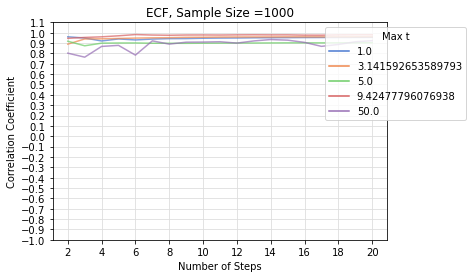

In [68]:
d.plot_cv_ecf(ecf_ht_res)

#### multimodal Gaussian

In [69]:
nr_mm_dist = 10
nr_modes = 5
ecf_mm_res = d.cv_ecf_mm(sample_size_list, max_t_list, num_steps_list, nr_sample_sets, nr_mm_dist, nr_modes)

Completed:   0%|          | 0/6 [00:00<?, ?it/s]

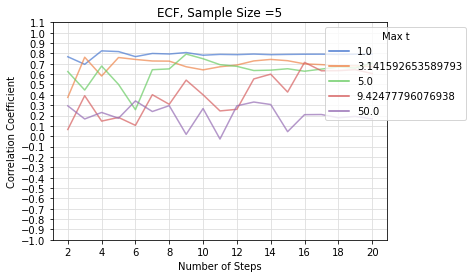

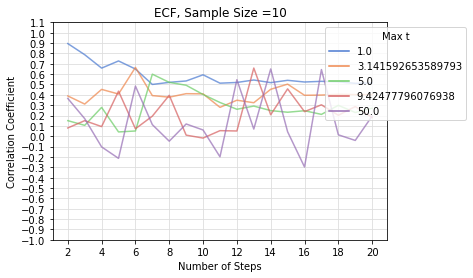

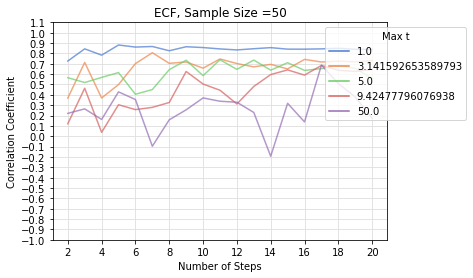

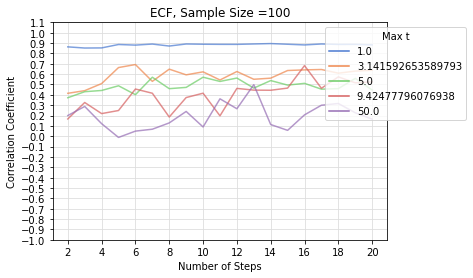

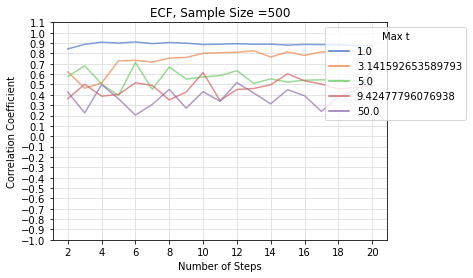

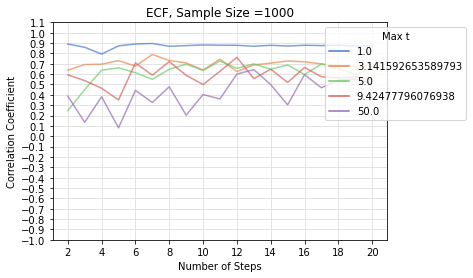

In [70]:
d.plot_cv_ecf(ecf_mm_res)